(sec:ode-initial-value-problems)=
# Initial Value Problems

A simplest initial value problem in physics is first order ODEs expressed in a standard form,

$$
\dot{\mathbf{x}} = \mathbf{F}(\mathbf{x},t) 
$$

where $\mathbf{F}$ is an arbitrary function of $\mathbf{x}$ and $t$.  $\mathbf{x}$ and $\mathbf{F}$ are often vector but they can bejust a set of scalar quatities or even just a single scalar quantity.  The solution to the ODE is a function of time $\mathbf{x}(t)$.  To solve it, we need to know $\mathbf{x}$ at some point $t=t_0$.  Usually, $t_0$ is an initial time and we want to know $\mathbf{x}(t)$ for $t>t_0$.  However, $t_0$ can be any point.  Once $\mathbf{x}(t_0)$ is given, we can find $x$ at any point $t$.


Second order ODEs

$$
\ddot{\mathbf{x}} = F(\mathbf{x},\dot{\mathbf{x}},t)
$$

is very important in physics since the Newton's equation of motion is written in this form.   Two initial conditions, usually $\mathbf{x}(t_0)$ and $\dot{\mathbf{x}}(t_0)$, are required to solve this problem.  The two conditions can be specified at two different points $\mathbf{x}t_0)$ and $\mathbf{x}(t_1)$, which will be discussed in {numref}`sec:ode-boundary-value-problems`.
In general, the second order ODEs of this kind can be transformed to a set of first order ODEs. Therefore, numerical methods for the first order ODEs can be used to solve the second order ODEs as well.  However, there are also algorithms specific to the second order ODEs such as the Verlet argorithm, which can be more efficient in certain applications.


## First Order ODEs

For simplicity, we focus on the first order ODE of a single scalar variable $x$ for a while. Multivariable cases will be discussed in the following subsections. More specifically, we want to solve the following type of ODE:

$$
\dot{x} = F(x,t)
$$(eq:ode-1d)

for a given function $F(x,t)$ and an initial condition $x(t_0)$ .  The exact solution is a continuous function $x(t)$ for time period from an initial time $t_0$ to a final time $t_F$.  However, in the computer we work with discrete time $t_n = t_0 + n h,\, n=0, \cdots, N$ where $h$ is a time step defined by $h=\displaystyle\frac{t_F-t_0}{N}$.  The numerical solution is expressed as a sequence $x(t_0), x(t_1), x(t_2), \cdots, x(t_N)$.  Our goal is to develop numerical algorithms to predict $x(t_{n+1})$  knowing the previous points $x(t_n), x(t_{n-1}), \cdots x(t_0)$. We can construct the whole sequence by repeating the procedure. In the following subsections, we use simplified expressions, $x_n \equiv x(t_n)$ and $F_n \equiv F(x(t_n),t_n)$. 

Solving an ODE is essentially equivalent to integration.  We convert the ODE {eq}`eq:ode-1d` to a recursive equation involving an integral.  Let us assume that we know $x_n$.  Integrating Eq. {eq}`eq:ode-1d` from $t_n$ to $t_{n+1}$, we obtain

$$
x_{n+1} = x_n + \int_{t_n}^{t_{n+1}} F[x(t),t]\, dt\, .
$$(eq:ode-integral)

which predicts $x_{n+1}$.  By repeating this recursively, we obtain the solution $x(t_0), x(t_1), x(t_2), \cdots, x(t_N)$. 
However, to calculate the integral in Eq. {eq}`eq:ode-integral`, we need to know $x(t)$ for the interval $(t_n, t_{n+1})$ but that is a solution we are looking for.  How can we evaluate the integral without knowing $x(t)$ for $t_n < t < t_{n+1}$?  The following methods approximate the integral using only the known information, that is the previous points $\{x_n, x_{n-1}, \cdots, x_0\}$.


### Euler method

We being with the simplest method which may not be useful in practical applications but gives us some idea of how numerical integration of an ODE works. We try to estimate the integral in Eq.  \{eq}`eq:ode-integral` assuming we know the values of $x_n$ and $F_n$.
{numref}`fig:euler-ode` illustrates what we are trying to do. Recall that the rectangle rule of numerical integration (see {numref}`sec:piecewise-integral`) depends only on the single point. We use the rectangular rule to approximate the integral in Eq. {eq}`eq:ode-integral` as shown in the left panel of {numref}`fig:euler-ode`:

$$
\int_{t_n}^{t_{n+1}} F[x(t),t] dt \approx F_n\, h
$$(eq:ode-rectangular)

which leads to the Euler method:

$$
x_{n+1} \approx x_n + F_n\, h.
$$(eq:euler-rule)

Starting from the initial value, $x_0$, we first evaluate $F_0=F(x_0,t_0)$.  Then, we obtain $x_1$ by Eq. {eq}`eq:euler-rule`.
Using this procedure recursively, we obtain the whole sequence from $x_0$ to $x_N$.

The Euler method is also equivalent to the forward finite difference method of numerical derivative (see {numref}`sec:finite-diff`) as illustrated in the right panel of {numref}`fig:euler-ode`.  Substituting the approximated derivative $\dot{x}_n \approx (x_{n+1} - x_{n})/h$ into the ODE {eq}`eq:ode-1d`, we obtain $(x_{n+1} - x_{n})/h = F_{n}$.  Rearranging this expression, we obtain the Euler rule {eq}`eq:euler-rule`.

The area omitted in the left panel of {numref}`fig:euler-ode is order of $h^2$.  Therefore the local error of the Euler method is the order of $h^2$. After $N$ iteration, the global error becomes $N h^2 \sim \order{h}$.  We hope that this is a good approximation with a sufficiently small $h$. However, the Euler method is not good enough in practice.  An example is given after the predictor-corrector method is introduced.


```{figure} euler-ode.webp
:name: fig:euler-ode
Illustration of the Euler method.  *Left*: The curve in the figure represents the integrand of Eq. (\ref{eq:ode-integral}), which is unknown to us. Knowing $F_n$ and $h$, we approximate the integral by the rectangular rule discussed in {numref}`sec:piecewise-integral`.  The unaccounted area is proportional to $h^2$.  *Right*: Using the slope of the curve $F_n$,  we extrapolate next point $x_{n+1}$ assuming the curve is close to a straight line within a small step $h$. This is equivalent to use the forward finite difference method of the first order derivative discussed in {numref}`sec:finite-diff`.

```{admonition} Algorithm 6.2.1:  Euler method

1. Set the total period $T$ and the number of steps $N$
2. Calculate the step size $h=\displaystyle\frac{T}{N}$.
3. Set the initial condition $x_0$ and $t_0=0$.
4. Starting with $n=0$, repeat the following $N$ times
   1. Evaluate the function $F_n=F(x_n,t_n)$.
   2. Calculate a new point $x_{n+1}=x_n+F_n h$.
   3. Increment the step: $n=n+1$.
```

### Predictor-Corrector Method

Can we improve the accuracy using a better integration method?  We expect that the accuracy will be improved if the trapezoidal rule is used instead of the rectangular rule.  Let us try it.
Substituting the trapezoidal rule (see the left panel of {numref}`fig:predict-correct`.)

$$
    \int_{t_n}^{t_{n+1}} F[x(t),t] dt \approx \frac{(F_n + F_{n+1}) h}{2}
$$(eq:ode-trapezoidal)

to the Eq. {eq}`eq:ode-integral`, we obtain a recursive equation:

$$
x_{n+1} \approx x_n + \frac{h}{2} \left[ F(x_n,t_n) + F(x_{n+1},t_{n+1} \right] .
$$(eq:ode-implicit)

which is implicit since the both sides contain $x_{n+1}$.  To find $x_{n+1}$, we must use a root-finding method,
which is in principle possible but too time-consuming for practical applications.  A better way is to use an approximate value of $x_{n+1}$ in the right hand side. We *predict* $x_{n+1}$ using the Euler method and then *correct* it by Eq. {eq}`eq:ode-implicit`. More specifically, substituting Eq. {eq}`eq:euler-rule` into $F(x_{n+1},t_n+h)$ in Eq. {eq}`eq:ode-implicit`, we obtain 

$$
x_{n+1} \approx x_n + \frac{h}{2} \left[ F(x_n,t_n) + F\left(x_n + F(x_n,t_n) h, t_{n+1} \right) \right].
$$(eq:ode-predictor-corrector)

which is not implicit anymore. This is the "predictor-corrector" method.    This procedure is equivalent to approximate the $\dot(x)$ with the mean finite difference method discussed in {numref}`sec:finite-diff`. (see the right panel of {numref}`fig:predict-correct`.)

```{figure} predict-correct.webp
:name: fig:predict-correct
Illustration of the predictor-corrector method.  *Left*: The curve in the figure represents the integrand of Eq. (\ref{eq:ode-integral}), which is unknown to us. Knowing $F_n$ and $h$, we approximate the integral by the trapezoidal rule discussed in {numref}`sec:piecewise-integral`.  The unaccounted area is proportional to $h^2$.  *Right*: Using the two slopes of the curve $F_n$,  we extrapolate next point $x_{n+1}$ assuming the curve is close to a straight line within a small step $h$. This is equivalent to use the mean finite difference method of the first order derivative discussed in {numref}`sec:finite-diff`.

```{admonition} Algorithm 6.2.2:  Predictor-corrector method

1. Set the total period $T$ and the number of steps $N$
2. Calculate the step size $h=\displaystyle\frac{T}{N}$.
3. Set the initial condition $x_0$ and $t_0=0$.
4. Starting with $n=0$, repeat the following $N$ times
   1. Predictor: $k_1 = F(x_n,t_n)$
   2. Corrector: $k_2 = F(x_n+k_1 h,t_{n+1})$.
   3. New point: $x_{n+1}=x_n + \displaystyle\frac{h}{2} \left ( k_1 + k_2 \right )$.
   4. Increment the step: $n=n+1$.
```

**Example** {numref}`%s.1 <sec:ode-initial-value-problems>`

A particle of mass $m$ is dropped from rest under a uniform gravity $g$.  The drag force due to the presence of air is $-\gamma v$ where $v$ is velocity and $\gamma$ the frictional coefficient. The equation of motion is given by the Newton equation:

$$
m \dot{v} = - \gamma v - m g
$$(eq:eom-free-falling)

ans its solution is

$$
v(t) = \frac{m g}{\gamma} \left ( e^{-\gamma t} -1 \right )\,.
$$

where $-m g /\gamma$ is the terminal velocity.

Let us integrate the Newton equations using Euler and Predictor-Corrector methods and compare the results with the exact solution.  We integrate from $t=0$ to $t=10$ using the step size $h=0.01$.  As usual, we simplify the mathematical expression by normalizing quantities and reduce the number of parameters.  By normalizing the time as $\tau =\gamma t/m$ and introducing a new constant $\xi = m  g /gamma$, Eq. {eq}`eq:eom-free-falling` becomes $\dot{v} = -v + \xi$ where $\dot{v} = \frac{dv}{d\tau}$.   Now, we have only one parameter $\xi$ and the terminal velocity is given by $-\xi$.



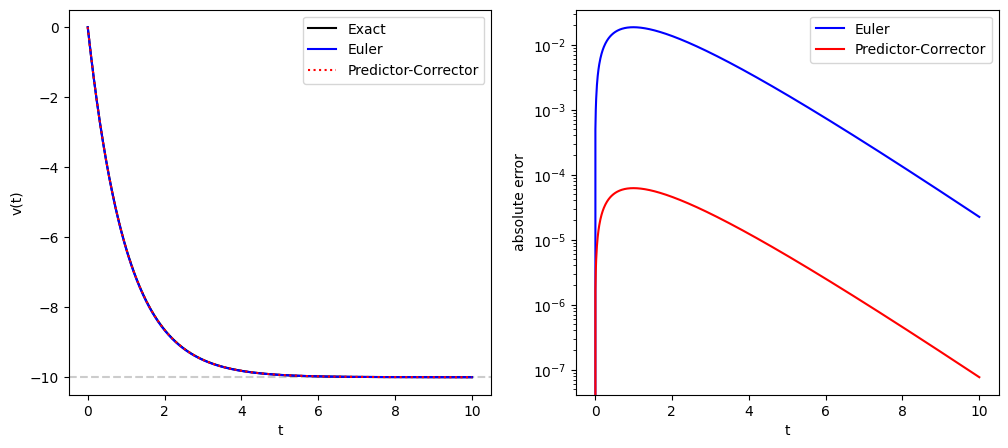

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# parameter
g=10.0

# integration parameters
tmax=10.  # maximum time
N=1000   # maximum steps
h=tmax/N # time step

# set arrays
v_ex=np.zeros(N+1)
v_eu=np.zeros(N+1)
v_pc=np.zeros(N+1)
t=np.linspace(0,N,N+1)*h

# intial condition
v_ex[0]=0.0
v_eu[0]=0.0
v_pc[0]=0.0

for i in range(0,N):
    # Euler method
    F = -v_eu[i] - g 
    v_eu[i+1] = v_eu[i] + F*h
    
    # Predictor-Corrector method
    F= -v_pc[i] - g
    v_pc[i+1] = v_pc[i] + F*h;  # predictor
    F = -(v_pc[i]+v_pc[i+1])/2 - g
    v_pc[i+1] = v_pc[i] + F*h   # corrector
    
    # Exact solution
    v_ex[i+1] = g*(np.exp(-t[i+1])-1)

plt.ioff()
plt.figure(figsize=(12,5))

# Plot the solutions
plt.subplot(1,2,1);
plt.axhline(y = -g, color = '0.8', linestyle = '--')
plt.plot(t,v_ex,'-k',label='Exact')
plt.plot(t,v_eu,'-b',label='Euler')
plt.plot(t,v_pc,':r',label='Predictor-Corrector')

plt.xlabel('t')
plt.ylabel('v(t)')
plt.legend(loc=1)

# Plot the absolute errors
plt.subplot(1,2,2)
plt.semilogy(t,abs(v_eu-v_ex),'-b',label='Euler')
plt.semilogy(t,abs(v_pc-v_ex),'-r',label='Predictor-Corrector')

plt.xlabel('t')
plt.ylabel('absolute error')
plt.legend(loc=1)
plt.show()

The left plots show that the trajectories of the two numerical methods agree with the exact trajectory at least in he naked eyes.  The right panel plots the absolute errors.  The predictor-corrector method is significantly better than the Euler method.

### 2nd-Order Runge-Kutta Method

### 4th-Order Runge-Kutta Method

### Adaptive Step: Runge-Kutta-Fehlberg Method

## Coupled First Order ODEs

## Second-Order ODEs

### Second-Order ODEs as a Coupled First-Order ODEs

### Verlet Method